In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
tf.config.experimental.list_physical_devices()
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Dense ,Dropout, Flatten
from tensorflow.keras.layers import Input
#import matplotlib.pyplot as plt

In [2]:
count = 0 
dirs = os.listdir('training_data/')
for dir in dirs:
    files = list(os.listdir('training_data/'+dir))
    print( dir +' Folder has '+ str(len(files)) + 'training_data')
    count = count + len(files)
print( 'Images Folder has total '+ str(count) + 'training_data')

0 Folder has 5923training_data
1 Folder has 6742training_data
2 Folder has 5958training_data
3 Folder has 6131training_data
4 Folder has 5842training_data
5 Folder has 5421training_data
6 Folder has 5918training_data
7 Folder has 6265training_data
8 Folder has 5851training_data
9 Folder has 5949training_data
Images Folder has total 60000training_data


In [3]:
base_dir = 'training_data/'
# img_size = 128

In [4]:
training_dataset=tf.keras.utils.image_dataset_from_directory(base_dir,
                                                           image_size=(28,28),
                                                           seed=123, batch_size=32)

Found 60000 files belonging to 10 classes.


In [5]:
base_dir = 'testing_data/'

In [6]:
testing_dataset=tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           image_size=(28,28),
                                                           seed=123, batch_size=32)

Found 10000 files belonging to 10 classes.


In [7]:
Character_names=training_dataset.class_names
Character_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [8]:
import matplotlib.pyplot as plt

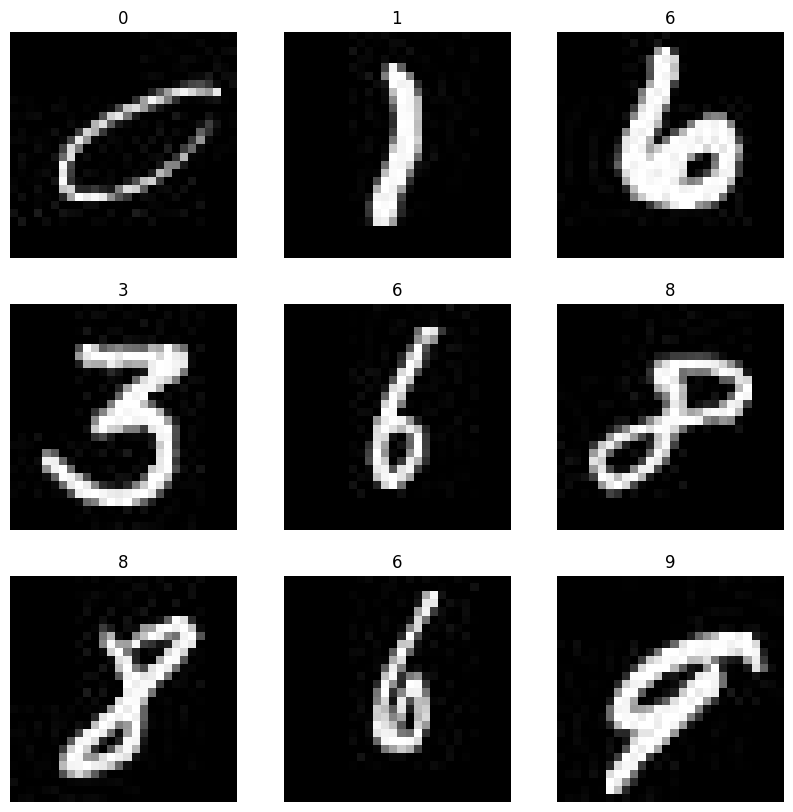

In [9]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in training_dataset.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(Character_names[labels[i]])
        plt.axis('off')

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

In [11]:
training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

In [12]:
validation_dataset = testing_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
model = Sequential([
    layers.Rescaling(1./255),    
    
    Conv2D(32, 3, padding='same', activation='relu'),  # Increased filters
    MaxPooling2D(),
    
    Conv2D(64, 3, padding='same', activation='relu'),  # Increased filters
    MaxPooling2D(),
    
    Conv2D(128, 3, padding='same', activation='relu'),  # Additional Conv layer with more filters
    MaxPooling2D(),
    
    Dropout(0.3),  # Increased dropout for better regularization
    
    Flatten(),
    Dense(256, activation='relu'),  # Increased neurons in the dense layer
    Dense(128, activation='relu'),  # Additional dense layer for more complexity
    Dense(10)  # Output layer
])

model.build(input_shape=(None, 28, 28, 3))


In [14]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,602 (1.61 MB)

 Trainable params: 422,602 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history =model.fit(training_dataset,epochs=20,validation_data=validation_dataset)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.8926 - loss: 0.3279 - val_accuracy: 0.9882 - val_loss: 0.0375
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9822 - loss: 0.0564 - val_accuracy: 0.9913 - val_loss: 0.0286
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9875 - loss: 0.0401 - val_accuracy: 0.9906 - val_loss: 0.0302
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9890 - loss: 0.0353 - val_accuracy: 0.9885 - val_loss: 0.0386
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9913 - loss: 0.0266 - val_accuracy: 0.9910 - val_loss: 0.0296
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9931 - loss: 0.0228 - val_accuracy: 0.9896 - val_loss: 0.0347
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9944 - loss: 0.0196 - val_accuracy: 0.9921 - val_loss: 0.0251
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.9944 -

In [22]:
accuracy=model.evaluate(training_dataset)
print("%s: %2f%%"%(model.metrics_names[1],accuracy[1]*100))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9986 - loss: 0.0042
compile_metrics: 99.866664%


In [18]:
accuracy=model.evaluate(validation_dataset)
print("%s: %2f%%"%(model.metrics_names[1],accuracy[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9918 - loss: 0.0321
compile_metrics: 99.190003%


In [24]:
model.save('Digit_Recognition.keras')